In [1]:
import becquerel as bq
from becquerel import Spectrum
from becquerel.tools import Isotope, IsotopeQuantity, NeutronIrradiation
import datetime
import numpy as np
import scipy.integrate as integrate
import math as m
import importlib
import pandas as pd
import sys
import os
import csv
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\benhu\\Desktop\\Research\\radwatch-analysis\\ROI.py'>

In [2]:
source_energies = np.array([609, 1460, 2614]);
energies_list = np.array(['609 Peak','1460 Peak','2614 Peak']);
spectrum = r'C:\Users\benhu\Desktop\Research\DataFiles\UCB087_Wild_King_Salmon_2.Spe'
background = r'C:\Users\benhu\Desktop\Research\DataFiles\UCB096_Backgorund_2_13_17.Spe'
spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\UCB087_Wild_King_Salmon_2.Spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\UCB096_Backgorund_2_13_17.Spe


In [3]:
roi0 = ROI.ROI(spec, bgspec, [source_energies.item(0)], 1)
roi0.find_peak_energies()
roi0_counts, roi0_unc = roi0.get_counts()

c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:726: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  'have been converted to CPS', SpectrumWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


peak counts 326.0
bg counts 295.0


In [4]:
roi1 = ROI.ROI(spec, bgspec, [source_energies.item(1)], 1)
roi1.find_peak_energies()
roi1_counts, roi1_unc = roi1.get_counts()

peak counts 26094.999999999993
bg counts 60.5


In [5]:
roi2 = ROI.ROI(spec, bgspec, [source_energies.item(2)], 1)
roi2.find_peak_energies()
roi2_counts, roi2_unc = roi2.get_counts()

peak counts -23.999999999999996
bg counts 2.5


In [6]:
def f_near(a,a0):
    idx = np.abs(a-a0).argmin()
    return idx

def plot_peak_region(roi, spectrum,source_energies,name):
    roi.find_peak_energies()
    target_peaks = roi.target_peaks
    for i,j in zip(source_energies,target_peaks):
        spec = spectrum
        counts = spec.counts_vals
        energies = spec.bin_centers_kev
        idx = f_near(energies,i) 
        roi_low = idx - 50
        roi_high = idx + 50

        plot_counts = counts[roi_low:roi_high]
        plot_energies = energies[roi_low:roi_high]

        roi_low_bins,roi_peak_bins,roi_high_bins = roi.get_roi_windows(j)
        rlow = roi_low_bins[0][0]
        rhi = roi_high_bins[0][-1]
        plot_counts = counts[rlow:rhi]
        plot_energies = energies[rlow:rhi]

        rlow = roi_low_bins[0][0]
        rhi = roi_low_bins[0][-1]
        low_counts = counts[rlow:rhi]
        low_energies = energies[rlow:rhi]

        rlow = roi_high_bins[0][0]
        rhi = roi_high_bins[0][-1]
        high_counts = counts[rlow:rhi]
        high_energies = energies[rlow:rhi]

        rlow = roi_peak_bins[0][0]
        rhi = roi_peak_bins[0][-1]
        peak_counts = counts[rlow:rhi]
        peak_energies = energies[rlow:rhi]

        fig,ax = plt.subplots()
        ax.plot(plot_energies,plot_counts)
        ax.fill_between(low_energies,0,low_counts,facecolor = 'green',interpolate=True)
        ax.fill_between(high_energies,0,high_counts,facecolor = 'red',interpolate=True)
        ax.fill_between(peak_energies,0,peak_counts,facecolor = 'blue',interpolate=True)
        ax.set_yscale('log')
        plt.title(name)

In [7]:
counts = spec.counts_vals
energies = spec.bin_centers_kev

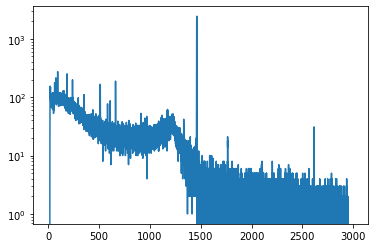

In [8]:
plt.plot(energies,counts)
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


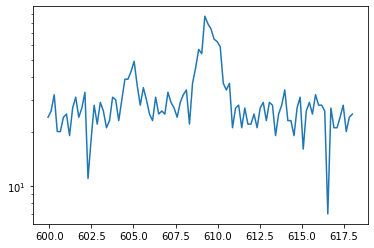

In [9]:
index0 = f_near(energies, source_energies[0])
plt.plot(energies[index0-50:index0+50], counts[index0-50:index0+50])
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


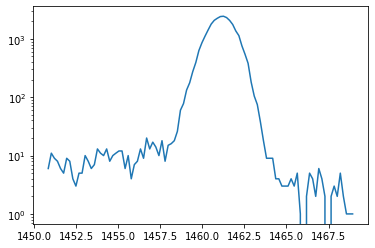

In [10]:
index1 = f_near(energies, source_energies[1])
plt.plot(energies[index1-50:index1+50], counts[index1-50:index1+50])
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


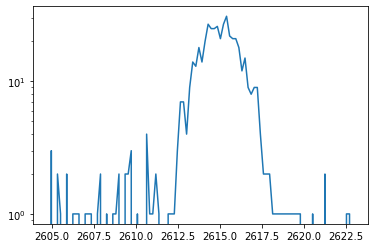

In [11]:
index2 = f_near(energies, source_energies[2])
plt.plot(energies[index2-50:index2+50], counts[index2-50:index2+50])
plt.yscale('log')

[ 609 1460 2614]


c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


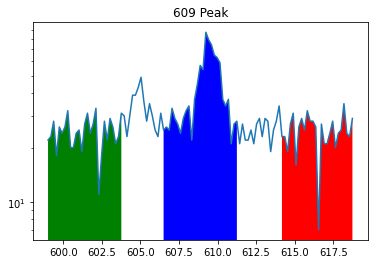

In [19]:
delta_e0 = 5
window0 = np.array([[-2, -1], [-0.5, 0.5], [1, 2]])
roi0.set_sideband(delta_e0,window0)

plot_peak_region(roi0, spec, source_energies, energies_list.item(0))

print(source_energies)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


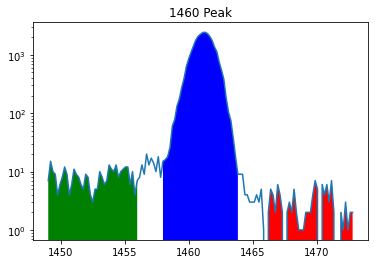

In [13]:
delta_e1 = 6
window1 = np.array([[-2, -0.78], [-0.52, 0.5], [0.78, 2]])
roi1.set_sideband(delta_e1,window1)

plot_peak_region(roi1, spec, source_energies, energies_list.item(1))

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


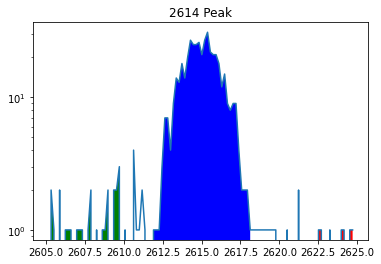

In [14]:
delta_e2 = 5
window2 = np.array([[-2, -1], [-0.67, 0.67], [1, 2]])
roi2.set_sideband(delta_e2,window2)

plot_peak_region(roi2, spec, source_energies, energies_list.item(2))

In [15]:
def sqr(x):
    return x * x

lst = [3, 2, 3]

for i in lst:
    lst[i - 1] = sqr(i)
    
print(lst)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list assignment index out of range

In [ ]:
roi0 = ROI.ROI(spec, bgspec, [source_energies.item(0)], 1)
roi0.find_peak_energies()
roi0_counts, roi0_unc = roi0.get_counts()

In [ ]:
source_energies_list = np.ndarray.tolist(source_energies)

roi = []
for i in source_energies_list:
    roi.append(ROI.ROI(spec, bgspec, [source_energies.item(i)], 1))
    roi[i].find_peak_energies()

print(source_energies_list)

In [ ]:
delta_etest = 5
window0 = np.array([[-2, -1], [-0.5, 0.5], [1, 2]])
roi0.set_sideband(delta_e0,window0)

plot_peak_region(roi0, spec, source_energies, energies_list.item(0))

print(source_energies)